In [1]:
import pandas as pd
schedules = pd.read_csv('../schedules_to_may_2024.csv', sep='|')

In [2]:
print(schedules)

                        vesselId            shippingLineId  \
0       61e9f3b1b937134a3c4bfe53  61a8e672f9cba188601e84ac   
1       61e9f3b1b937134a3c4bfe53  61a8e672f9cba188601e84ac   
2       61e9f3b1b937134a3c4bfe53  61a8e672f9cba188601e84ac   
3       61e9f3b1b937134a3c4bfe53  61a8e672f9cba188601e84ac   
4       61e9f3b1b937134a3c4bfe53  61a8e672f9cba188601e84ac   
...                          ...                       ...   
136245  61e9f3abb937134a3c4bfe19  61a8e672f9cba188601e84ab   
136246  61e9f3abb937134a3c4bfe19  61a8e672f9cba188601e84ab   
136247  61e9f3abb937134a3c4bfe19  61a8e672f9cba188601e84ab   
136248  61e9f3a9b937134a3c4bfe01  61a8e672f9cba188601e84ab   
136249  61e9f3a9b937134a3c4bfe01  61a8e672f9cba188601e84ab   

                  shippingLineName                arrivalDate  \
0       Wallenius Wilhelmsen Ocean  2023-10-02 00:00:00+00:00   
1       Wallenius Wilhelmsen Ocean  2023-10-27 00:00:00+00:00   
2       Wallenius Wilhelmsen Ocean  2023-10-19 00:00:00+00:0

In [6]:
display(schedules.head())

,vesselId,shippingLineId,shippingLineName,arrivalDate,sailingDate,portName,portId,portLatitude,portLongitude
0,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-02 00:00:00+00:00,2023-10-03 00:00:00+00:00,Port of Brunswick,61d38499b7b7526e1adf3d54,31.140556,-81.496667
1,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-27 00:00:00+00:00,2023-10-27 00:00:00+00:00,Port of Southampton,61d3832bb7b7526e1adf3b63,50.902500,-1.428889
2,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-19 00:00:00+00:00,2023-10-20 00:00:00+00:00,Port of Bremerhaven,61d375e793c6feb83e5eb3e2,53.563611,8.554722
3,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-10-09 00:00:00+00:00,2023-10-10 00:00:00+00:00,Port of New York,61d38481b7b7526e1adf3d23,40.688333,-74.028611
4,61e9f3b1b937134a3c4bfe53,61a8e672f9cba188601e84ac,Wallenius Wilhelmsen Ocean,2023-09-25 00:00:00+00:00,2023-09-26 00:00:00+00:00,Manzanillo International Terminal,61d37d0199db2ccf7339eee1,9.372370,-79.879790


In [11]:
print(schedules.shape)

(136250, 9)


In [ ]:
# Missing Values
print(schedules.isnull().sum())

In [12]:
# Data Types
print(schedules.dtypes)

vesselId             object
shippingLineId       object
shippingLineName     object
arrivalDate          object
sailingDate          object
portName             object
portId               object
portLatitude        float64
portLongitude       float64
dtype: object


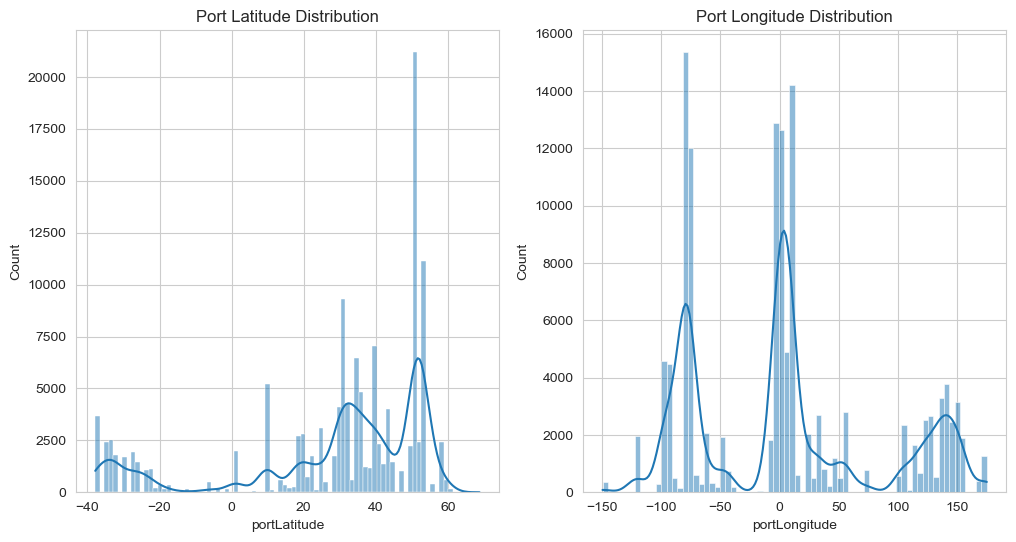

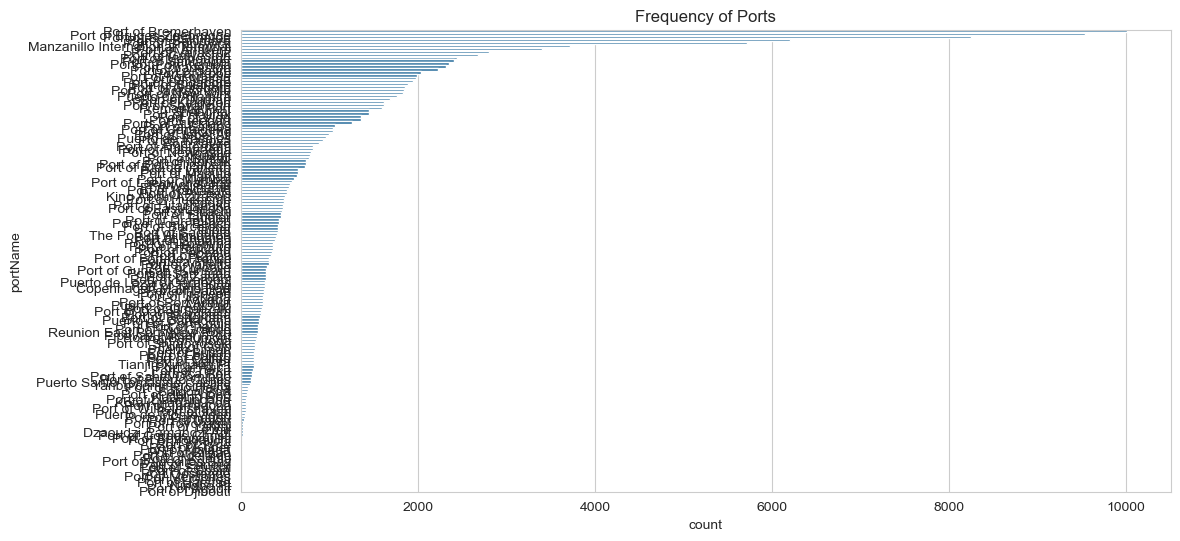

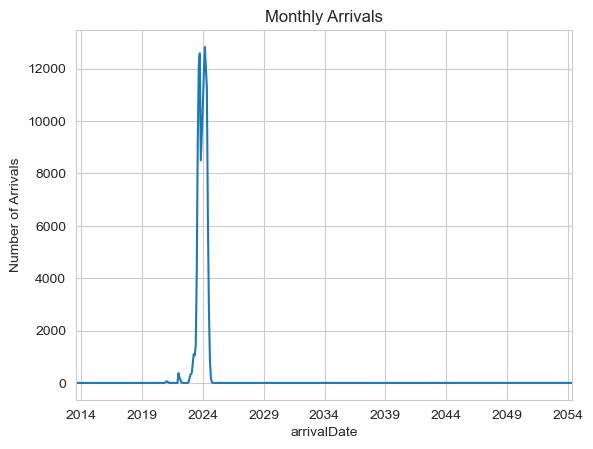

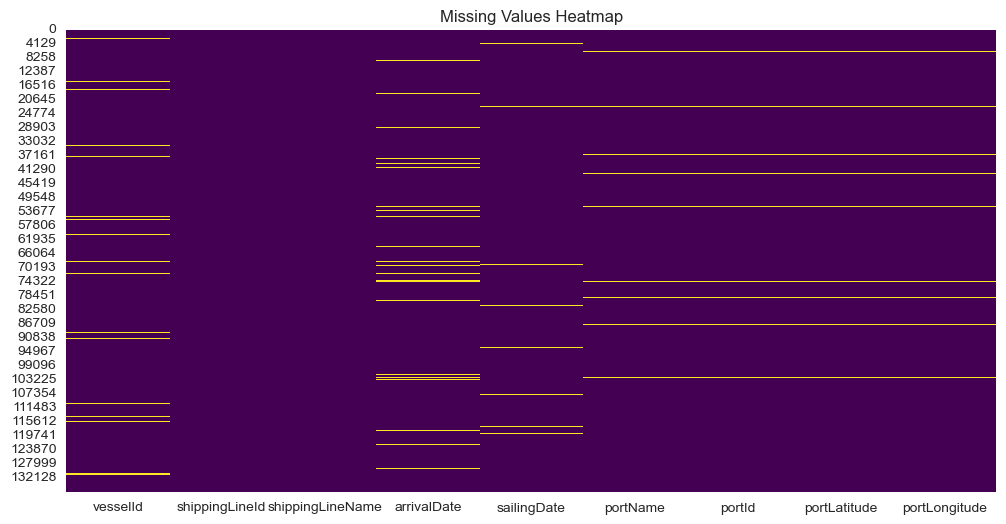

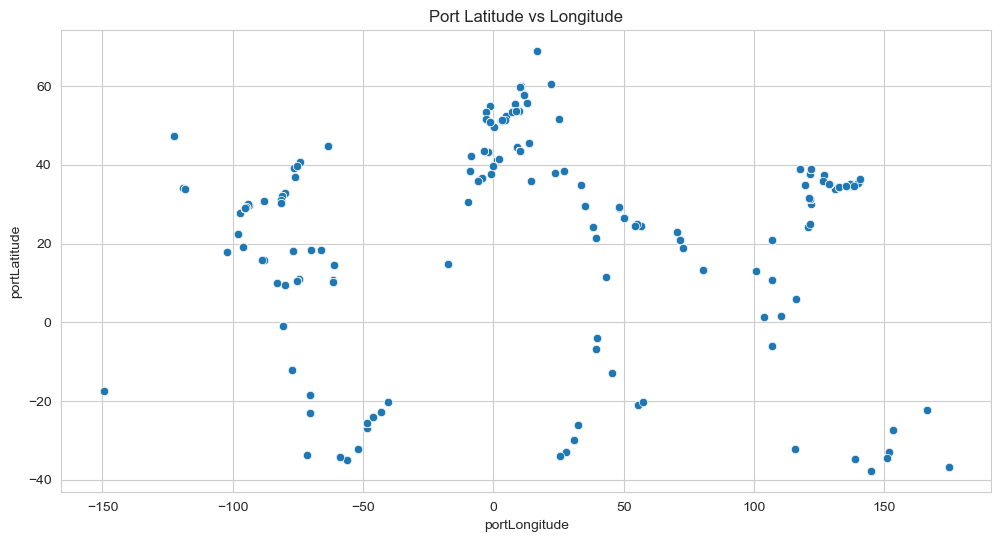

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
schedules = pd.read_csv('../schedules_to_may_2024.csv', sep='|')

# Convert date columns to datetime
schedules['arrivalDate'] = pd.to_datetime(schedules['arrivalDate'])
schedules['sailingDate'] = pd.to_datetime(schedules['sailingDate'])

# Histogram for portLatitude and portLongitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(schedules['portLatitude'], kde=True)
plt.title('Port Latitude Distribution')
plt.subplot(1, 2, 2)
sns.histplot(schedules['portLongitude'], kde=True)
plt.title('Port Longitude Distribution')
plt.show()

# Bar plot for portName
plt.figure(figsize=(12, 6))
sns.countplot(y='portName', data=schedules, order=schedules['portName'].value_counts().index)
plt.title('Frequency of Ports')
plt.show()

# Time series plot for arrivalDate
schedules.set_index('arrivalDate').resample('M').size().plot()
plt.title('Monthly Arrivals')
plt.ylabel('Number of Arrivals')
plt.show()

# Heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(schedules.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Scatter plot for portLatitude vs portLongitude
plt.figure(figsize=(12, 6))
sns.scatterplot(x='portLongitude', y='portLatitude', data=schedules)
plt.title('Port Latitude vs Longitude')
plt.show()